In [25]:
#Ejercicio 02 de Algebra Lineal SVD y PCA
#Autor : Enrique Alvarado

#Cargamos librerias
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [26]:
#Cargamos los datos del dataset
data_path = "./data/MMA Fighters  Gyms.csv"
df = pd.read_csv(data_path, encoding='Latin1')

In [27]:
#Quitamos nulos y convertimos variable "reach" a numerica
df = df.dropna(axis = 0)
df['reach'] = df['reach'].astype('string')
df['reach'] = df['reach'].str.extract(r'(\d+.\d+)').astype('float')

In [19]:
df

,title,country,stance,reach,age,weightClass,trainingCenter,wins,loses,draws,tkos,tko wins,tko lose,subs,subs win,subs lose
5,Johnny Bedford,USA,Orthodox,71.0,35.0,Bantamweight,Fitness Fight Factory,23,13,1,10 2,10,2,9 11,9,11
7,Joshua Burkman,USA,Orthodox,72.0,37.0,Welterweight,The Pit Elevated Fight Team,28,17,0,7 2,7,2,10 9,10,9
9435,Syuri Kondo,JAPAN,Orthodox,66.0,29.0,Women's Strawweight,Vos Gym,6,1,0,1 1,1,1,0 - 0,0,0
9489,Hugo Viana,BRAZIL,Orthodox,67.5,35.0,Bantamweight,Champion Team,8,4,0,1 2,1,2,0 - 0,0,0
9542,Yoel Romero,CUBA,Southpaw,73.5,41.0,Middleweight,American Top Team,13,3,0,11 1,11,1,0 - 0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21901,Luan Chagas,BRAZIL,Orthodox,75.0,25.0,Welterweight,Gile Ribeiro Team / Noguchi Team,15,3,1,6 1,6,1,9 2,9,2
21902,Bobby Green,USA,Orthodox,71.0,31.0,Lightweight,Pinnacle Jiu-Jitsu,24,8,0,8 2,8,2,9 2,9,2
21910,Michelle Waterson,USA,Orthodox,62.0,32.0,Women's Strawweight,Jackson-Wink MMA,15,6,0,3 1,3,1,9 3,9,3
21917,Dennis Siver,GERMANY,Orthodox,70.0,39.0,Featherweight,Kiboju,23,11,0,5 3,5,3,9 5,9,5


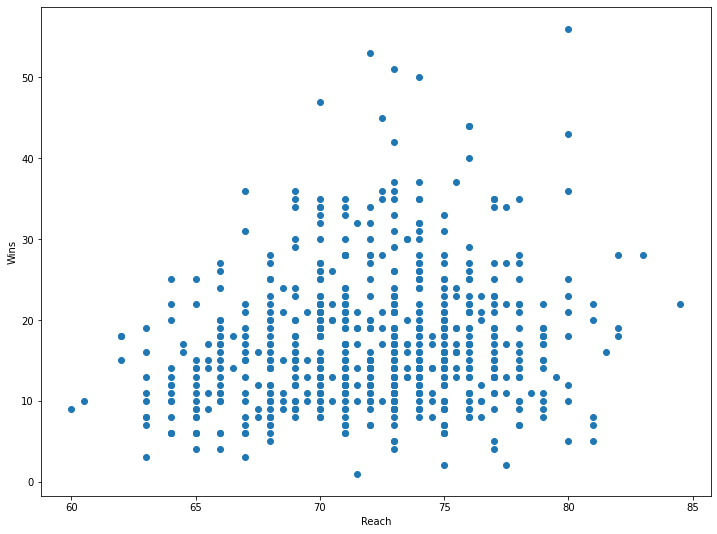

In [28]:
#Vamos a usar la variable "reach" contra la variable "Wins"
#en la grafica vemos que la variable "reach" no tiene una gran correlacion con la variable "wins"
#cuando mucho moderada con peleas ganadas
#lo vamos a dejar para completar el ejercicio
plt.rcParams['figure.figsize'] = (12.0, 9.0)

X = df.iloc[:, 3]
Y = df.iloc[:, 7]
plt.xlabel ('Reach')
plt.ylabel('Wins')
plt.scatter(X, Y)
plt.show()

In [29]:
# Construimos el modelo
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.2372299131858212 -0.0001854249826506893


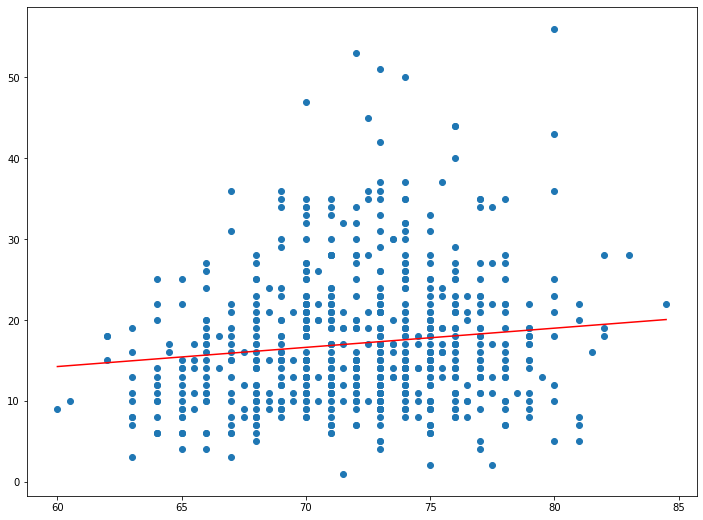

In [31]:
# Con los valores, puedo graficar con mi funcion resultado
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [ ]:
#Teóricamente, este problema de
#regresión lineal se puede resolver usando únicamente álgebra lineal (pero no es muy
#eficiente computacionalmente). ¿Podrías explicar cómo?

#R: Se puede resolver utilizando el metodo de minimos cuadrados, a reserva de probarlo creo que no haría diferencia